# Problem definition

In a statement,
Given clinical parameters, can we predict whether or not the the person has heart disease or not?

## Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://www.kaggle.com/johnsmith88/heart-disease-dataset

## Evaluation

If you can reach 95% accuracy out predicting whehter or not a patient has heart disease during the proof the concept. we'll pursue the project.

## Features

* Age: age of the patient [years]

* Sex: sex of the patient [M: Male, F: Female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or  ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

In [5]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

## Features

* Age: age of the patient [years]

* Sex: sex of the patient [1 = male; 0 = female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise induced angina (1 = yes; 0 = no)
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


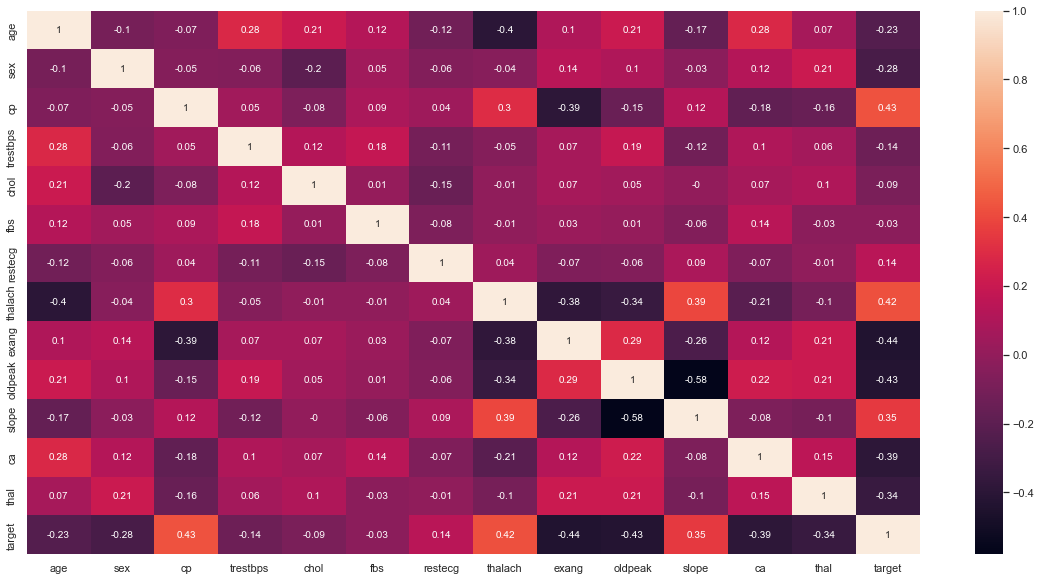

In [8]:
x= df.corr()
y = np.round(x,2)
plt.figure(figsize=(20,10))
plt.show(sns.heatmap(y,annot = True))


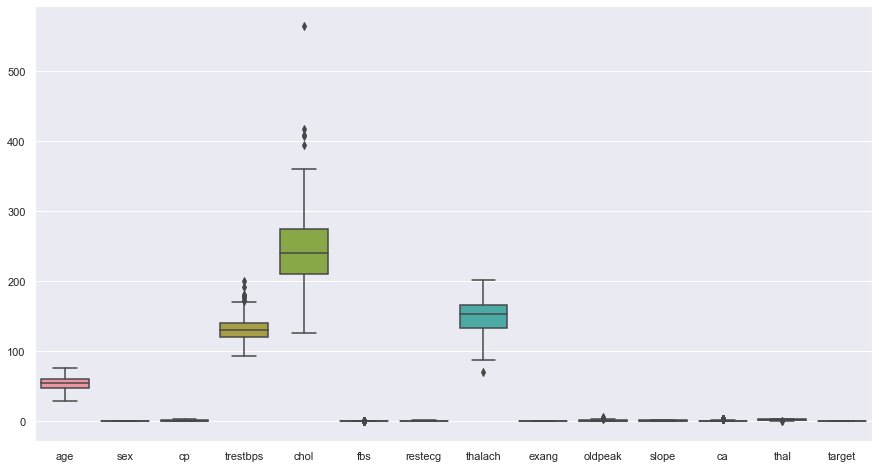

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df);

In [10]:
## Finding upper and lower limit.

data_std = df.std()
data_mean = df.mean()

anomaly_cutt_off = data_std*3

lower_limit = data_mean - anomaly_cutt_off
upper_limit = data_mean + anomaly_cutt_off

In [11]:
lower_limit

age         27.120034
sex         -0.714864
cp          -2.129161
trestbps    79.009334
chol        90.771773
fbs         -0.920079
restecg     -1.049526
thalach     80.931381
exang       -1.082651
oldpeak     -2.443621
slope       -0.449339
ca          -2.338446
thal         0.476702
target      -0.951950
dtype: float64

In [12]:
upper_limit

age          81.612640
sex           2.081201
cp            4.063154
trestbps    184.238191
chol        401.756279
fbs           1.217108
restecg       2.105632
thalach     218.362348
exang         1.736116
oldpeak       4.522829
slope         3.248018
ca            3.797192
thal          4.150361
target        2.041059
dtype: float64

In [13]:
df.chol.max()

564

### Check null values in the dataset

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

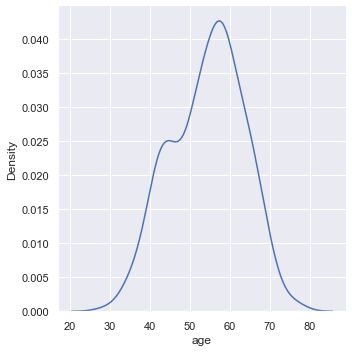

In [15]:
from scipy.stats import norm
ax = sns.displot(df['age'],kind='kde')

In [16]:
from numpy.ma.core import anomalies
def find_anomlies(df):
    
    anomlies=[]

    data_std = df['chol'].std()
    data_mean = df['chol'].mean()

    anomaly_cutt_off = data_std*3

    lower_limit = data_mean - anomaly_cutt_off
    upper_limit = data_mean + anomaly_cutt_off



# Generate Outliers
    for outlier in df['chol']:
        if outlier > upper_limit or outlier < lower_limit:
            anomlies.append(outlier)
    return anomlies


find_anomlies(df)

[417, 564, 407, 409]

## Heart Disease Frequency according to gender

In [17]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

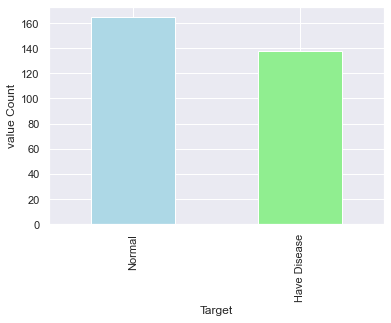

In [19]:
target = ["Normal", "Have Disease"]
xpos = np.arange(len(target))

df["target"].value_counts().plot(kind="bar", color=["lightblue", 'lightgreen']);
plt.xlabel('Target')
plt.ylabel('value Count');
plt.xticks(xpos, target);

In [20]:
## Compare Target column with Gender column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


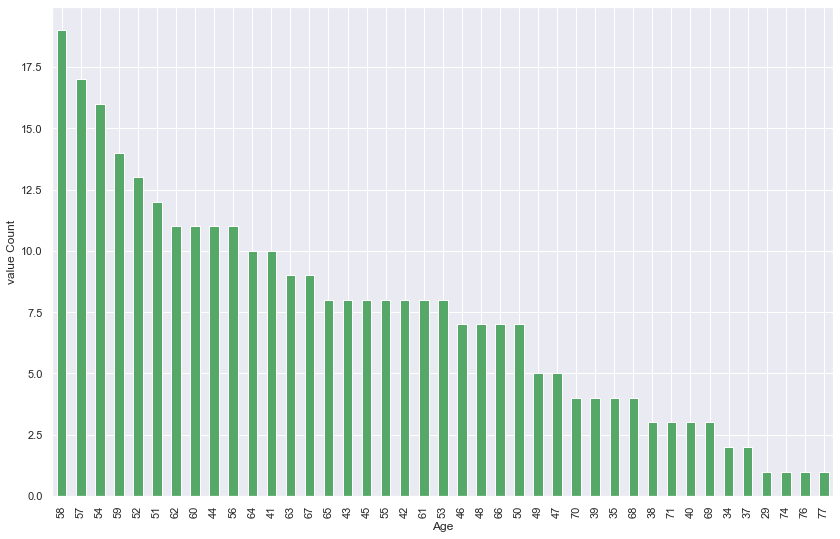

In [21]:
plt.figure(figsize=(14,9))
df['age'].value_counts().plot(kind='bar', color=['g']);
plt.xlabel('Age')
plt.ylabel('value Count');


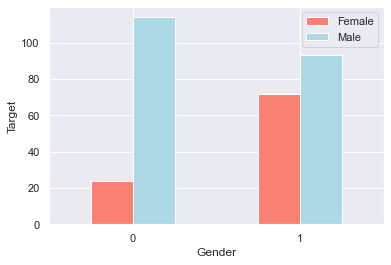

In [22]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon','lightblue']);
plt.xlabel('Gender')
plt.ylabel('Target');
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

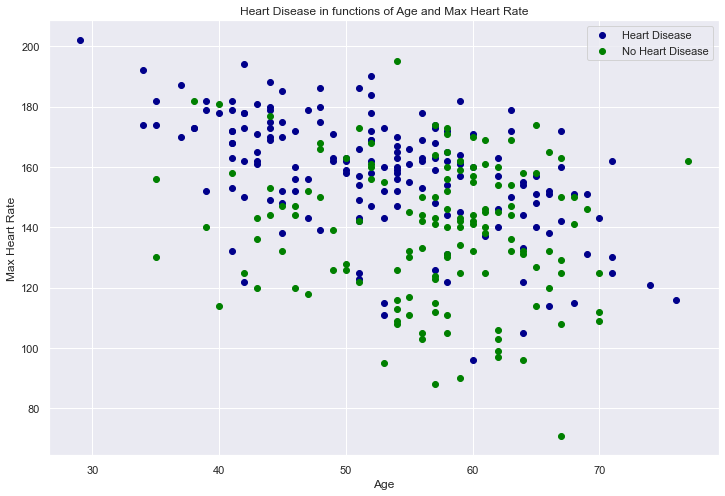

In [23]:
## Create figure

plt.figure(figsize=(12,8))

## Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='darkblue')

## Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = 'green')

plt.title('Heart Disease in functions of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.savefig("new photo.jpeg",dpi=1200)
plt.show();

## Modelling

Now we've got our data split into training and test sets, it's time to build a machine learning model

We'll traing it (find patterns) on the training set

And we'll test it (use the patterns on the test set)

We're going to try 5 different machine learning models::

1. Logistic Regression

2. Random Forest Classifier

3. Support Vector Classifier

4. Decision Tree Classifier

5. K-Nearest Neighbors Classiders


In [24]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'SupportVectorClassifier':SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'KNN':KNeighborsClassifier(),
}

X =df.drop(['target','chol','fbs'],axis=1)
y = df[['target']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

# Creating a function to determine the scores and fit the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  # Setup the random seed
  np.random.seed(42)

  # Make a dictionary to keep model_Scores
  model_scores = {}

  for name,model in models.items():
    # Fit the model into the data
    model.fit(X_train,y_train)

    # Evaluate the model and append and its scores to model_scores
    model_scores[name]  = model.score(X_test,y_test)

  # Return the model scores
  return model_scores

In [25]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANSHU\AppData\Local\Temp/ipykernel_516/2047703556.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mode

{'LogisticRegression': 0.8524590163934426,
 'RandomForestClassifier': 0.8524590163934426,
 'SupportVectorClassifier': 0.639344262295082,
 'DecisionTreeClassifier': 0.7540983606557377,
 'KNN': 0.6065573770491803}

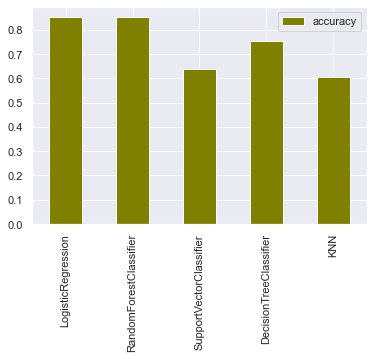

In [26]:
## Let's plot the scores
model_comparison = pd.DataFrame(model_scores,index=['accuracy'])
model_comparison.T.plot.bar(color="Olive");

In [27]:
df_new = df.copy()
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
from numpy.ma.core import anomalies
def find_anomlies(df):
    
    anomlies=[]

    data_std = df['chol'].std()
    data_mean = df['chol'].mean()

    anomaly_cutt_off = data_std*3

    lower_limit = data_mean - anomaly_cutt_off
    upper_limit = data_mean + anomaly_cutt_off



# Generate Outliers
    for outlier in df['chol']:
        if outlier > upper_limit or outlier < lower_limit:
            anomlies.append(outlier)
    return anomlies


find_anomlies(df)

[417, 564, 407, 409]

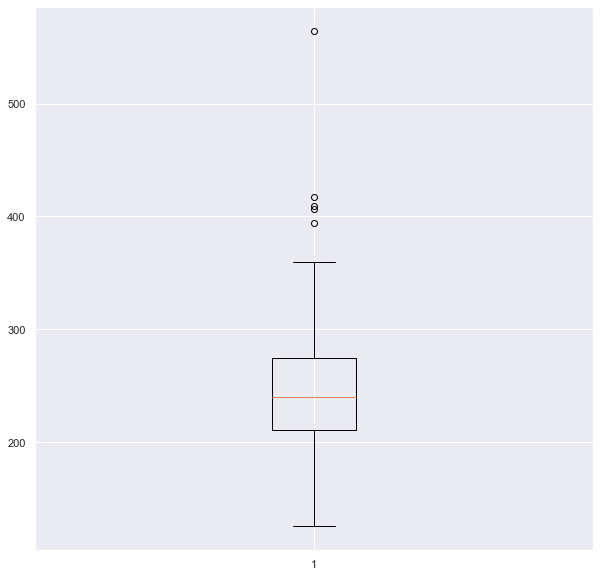

In [29]:
plt.figure(figsize=(10,10))
plt.boxplot(df_new["chol"]);

In [30]:
chol_data = df_new.chol
chol_data

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

In [31]:
df['chol'].describe().T

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [35]:
chol_outliers = df_new[(df_new.chol < lower_limit["chol"]) | (df_new.chol > upper_limit["chol"])].chol
chol_outliers

28     417
85     564
220    407
246    409
Name: chol, dtype: int64

In [36]:
df_new["chol"].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [37]:
new_chol_data = df_new["chol"].replace([chol_outliers], df['chol'].median())
new_chol_data

0      233.0
1      250.0
2      204.0
3      236.0
4      354.0
       ...  
298    241.0
299    264.0
300    193.0
301    131.0
302    236.0
Name: chol, Length: 303, dtype: float64

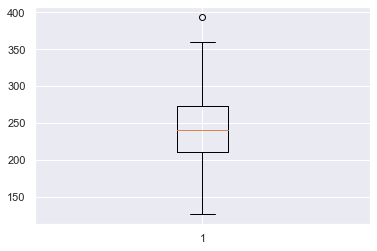

In [38]:
plt.boxplot(new_chol_data);

In [39]:
df_new["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [40]:
df_new['thalach'].values[df_new['thalach'].values > upper_limit["thalach"]] = df_new['thalach'].median()

In [41]:
df_new[df_new['thalach']>upper_limit["thalach"]].chol

Series([], Name: chol, dtype: int64)

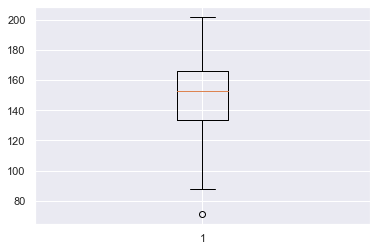

In [42]:
plt.boxplot(df_new["thalach"]);

In [43]:
model_scores

{'LogisticRegression': 0.8524590163934426,
 'RandomForestClassifier': 0.8524590163934426,
 'SupportVectorClassifier': 0.639344262295082,
 'DecisionTreeClassifier': 0.7540983606557377,
 'KNN': 0.6065573770491803}

In [44]:
y_train

,target
159,1
48,1
281,0
153,1
161,1
...,...
14,1
13,1
166,0
297,0


In [46]:
log_reg_grid = {"penalty":['l2','none'],
                "dual":[bool,False],
                "tol":[1e-4],
                "C":[1.0,float],
                "fit_intercept":[True,bool],
                "intercept_scaling":[float,1],
                "class_weight":['dict','balanced',None],
                "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                "max_iter":['int',100,200,400,1000,800],
                "multi_class":['auto', 'ovr', 'multinomial'],
                "verbose":[True,int,0,100,200,10,50,70,500],
                "warm_start":[bool,False],
                "n_jobs":[-1,1],
                "l1_ratio":[float,None]
                }

In [47]:
log_reg_model = RandomizedSearchCV(LogisticRegression(),
    param_distributions = log_reg_grid,
                                  cv = 5,
                                n_iter=20,
                                  verbose=True)

In [48]:
log_reg_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The sc

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packa

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The sc

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1.0, <class 'float'>],
                                        'class_weight': ['dict', 'balanced',
                                                         None],
                                        'dual': [<class 'bool'>, False],
                                        'fit_intercept': [True, <class 'bool'>],
                                        'intercept_scaling': [<class 'float'>,
                                                              1],
                                        'l1_ratio': [<class 'float'>, None],
                                        'max_iter': ['int', 100, 200, 400, 1000,
                                                     800],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'n_jobs': [-1, 1],
    

In [49]:
log_reg_model.score(X_test,y_test)

0.8360655737704918

In [50]:
log_reg_model.best_params_

{'warm_start': bool,
 'verbose': True,
 'tol': 0.0001,
 'solver': 'newton-cg',
 'penalty': 'l2',
 'n_jobs': -1,
 'multi_class': 'multinomial',
 'max_iter': 400,
 'l1_ratio': float,
 'intercept_scaling': float,
 'fit_intercept': True,
 'dual': False,
 'class_weight': None,
 'C': 1.0}

In [52]:
x = df.drop(['age','trestbps','chol','fbs','thalach', 'target'], axis=1)
y = df[["target"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)
clf = LogisticRegression()

clf.fit(X_train,y_train)

C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ANSHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
clf.score(X_test,y_test)

0.9032258064516129